# Flora Prepper Model Evaluation
## Initialize the environment

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pandas as pd

# Import custom modelling code
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.models.run_model import *
from src.visualization.visualize import *
import src.features as features

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jocelynpender/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import and visualize the data
### Visualize counts of training datasets

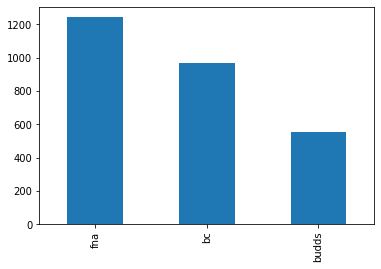

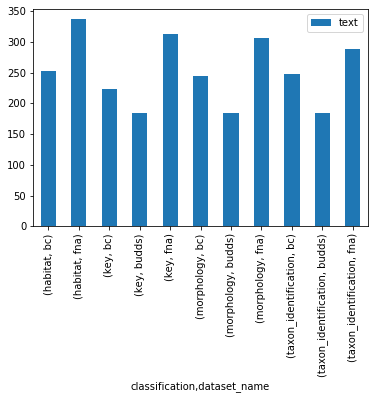

In [2]:
flora_data_frame = pd.read_csv("../data/processed/flora_data_frame.csv")
flora_data_frame['dataset_name'].value_counts().plot.bar()
plt.show()
flora_data_frame[['classification', 'dataset_name', 'text']] \
.groupby(['classification', 'dataset_name']).count().plot.bar()


### View a word cloud for all text data 
Text is processed using the same custom (bare-bones) tokenizer and stopwords used to train the model. 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jocelynpender/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


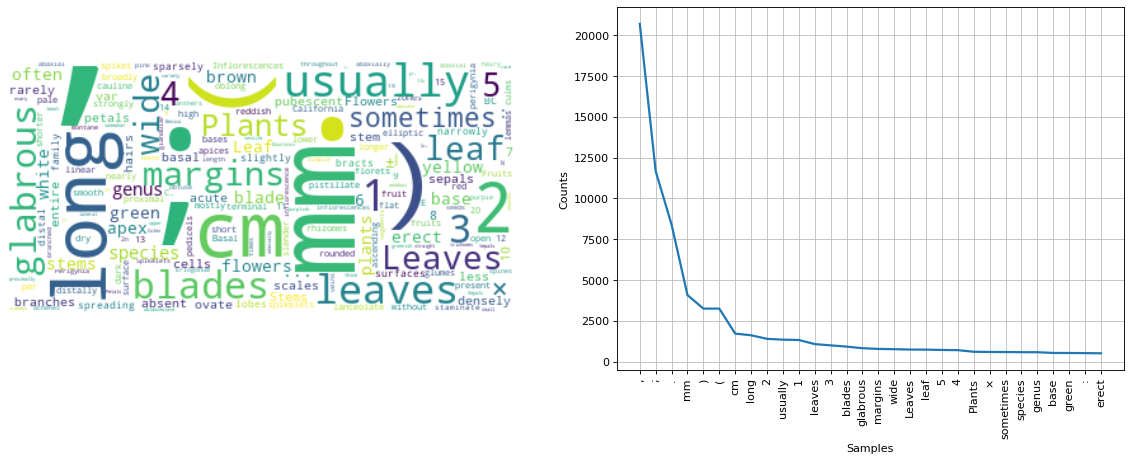

[(',', 20702), (';', 11674), ('.', 8393), ('mm', 4076), (')', 3248), ('(', 3247), ('cm', 1716), ('long', 1613), ('2', 1395), ('usually', 1344), ('1', 1325), ('leaves', 1073), ('3', 995), ('blades', 918), ('glabrous', 820), ('margins', 778), ('wide', 760), ('Leaves', 739), ('leaf', 733), ('5', 714), ('4', 702), ('Plants', 603), ('×', 590), ('sometimes', 586), ('species', 576), ('genus', 575), ('base', 530), ('green', 527), (':', 520), ('erect', 508)]


In [3]:
tokenized_stop_words = features.prepare_stop_words(custom_stop_words=["unknown", "accepted", "synonym",
                                                             "basionym", "source",
                                                             "note", "notes", "morphology"])  # Find a way to keep numbers and elipses!
# morphology word is an artefact of the FNA xml key statements. 
# TODO Return to this and fix
text = " ".join(text_string for text_string in flora_data_frame.text)
visualize_words(text, tokenized_stop_words)

#### What does the word cloud look like if we apply a strict preprocessing cleaning regime?

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jocelynpender/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


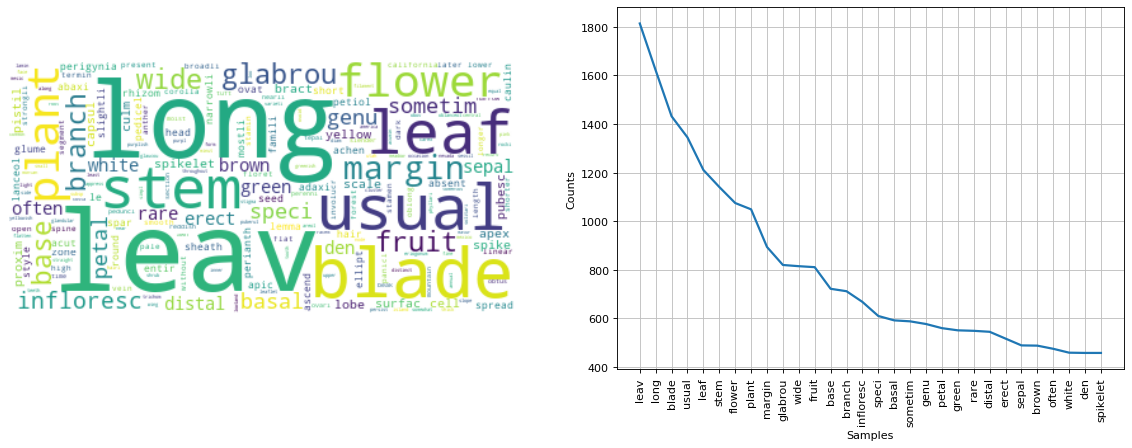

[('leav', 1814), ('long', 1621), ('blade', 1432), ('usual', 1345), ('leaf', 1211), ('stem', 1141), ('flower', 1075), ('plant', 1049), ('margin', 894), ('glabrou', 820), ('wide', 815), ('fruit', 811), ('base', 722), ('branch', 712), ('infloresc', 668), ('speci', 610), ('basal', 592), ('sometim', 588), ('genu', 577), ('petal', 560), ('green', 551), ('rare', 549), ('distal', 545), ('erect', 517), ('sepal', 489), ('brown', 488), ('often', 475), ('white', 459), ('den', 458), ('spikelet', 458)]


In [4]:
tokenized_stop_words_clean = features.prepare_stop_words(custom_stop_words=["unknown", "accepted", "synonym",
                                                             "basionym", "source",
                                                             "note", "notes", "morphology", "fna_id"], clean=True) 
visualize_words(text, tokenized_stop_words_clean, cleanup=True)

### Generate word clouds by classification.
Are there any noticeable differences between the words used most frequently between the classifications?

In [5]:
taxon_identification = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "taxon_identification"].text)
morphology = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "morphology"].text)
key = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "key"].text)
habitat = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.classification == "habitat"].text)

Taxon identification

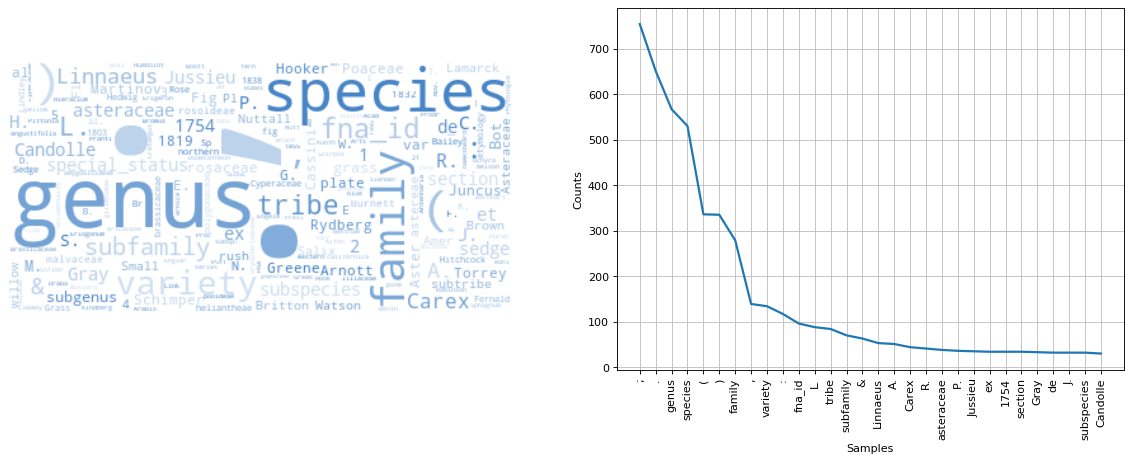

[(';', 754), ('.', 651), ('genus', 567), ('species', 530), ('(', 336), (')', 335), ('family', 279), (',', 139), ('variety', 134), (':', 117), ('fna_id', 96), ('L.', 88), ('tribe', 84), ('subfamily', 70), ('&', 63), ('Linnaeus', 53), ('A.', 51), ('Carex', 44), ('R.', 41), ('asteraceae', 38), ('P.', 36), ('Jussieu', 35), ('ex', 34), ('1754', 34), ('section', 34), ('Gray', 33), ('de', 32), ('J.', 32), ('subspecies', 32), ('Candolle', 30)]


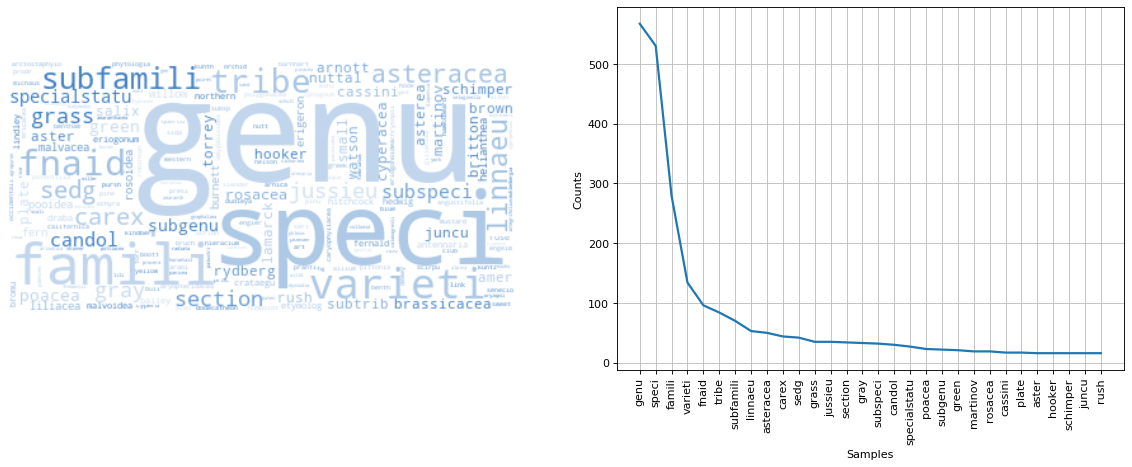

[('genu', 567), ('speci', 530), ('famili', 279), ('varieti', 134), ('fnaid', 96), ('tribe', 84), ('subfamili', 70), ('linnaeu', 53), ('asteracea', 50), ('carex', 44), ('sedg', 42), ('grass', 35), ('jussieu', 35), ('section', 34), ('gray', 33), ('subspeci', 32), ('candol', 30), ('specialstatu', 27), ('poacea', 23), ('subgenu', 22), ('green', 21), ('martinov', 19), ('rosacea', 19), ('cassini', 17), ('plate', 17), ('aster', 16), ('hooker', 16), ('schimper', 16), ('juncu', 16), ('rush', 16)]


In [6]:
visualize_words(taxon_identification, tokenized_stop_words, color="blue")
visualize_words(taxon_identification, tokenized_stop_words_clean, cleanup=True, color="blue")


Morphology

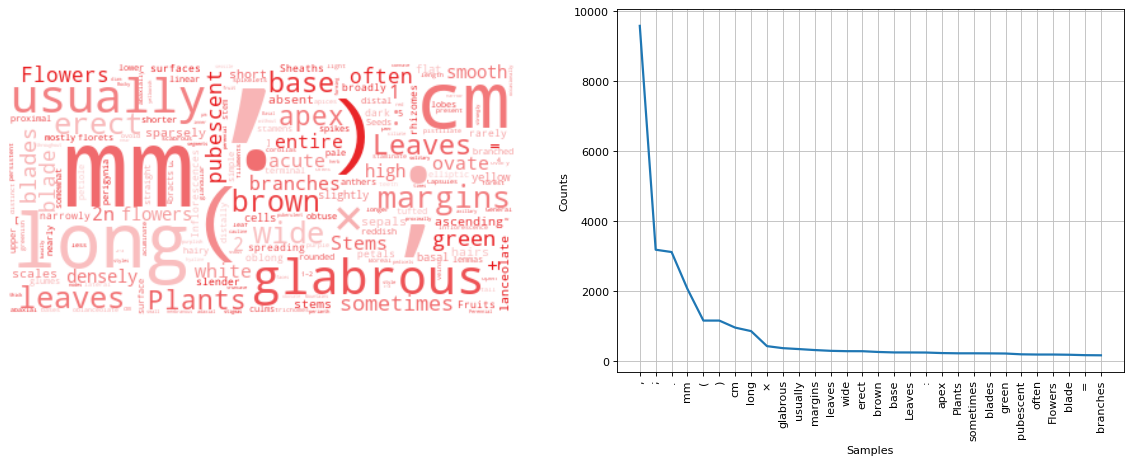

[(',', 9581), (';', 3186), ('.', 3120), ('mm', 2062), ('(', 1162), (')', 1162), ('cm', 961), ('long', 861), ('×', 432), ('glabrous', 374), ('usually', 348), ('margins', 320), ('leaves', 298), ('wide', 288), ('erect', 287), ('brown', 265), ('base', 252), ('Leaves', 251), (':', 249), ('apex', 234), ('Plants', 227), ('sometimes', 227), ('blades', 225), ('green', 221), ('pubescent', 198), ('often', 192), ('Flowers', 192), ('blade', 186), ('=', 174), ('branches', 170)]


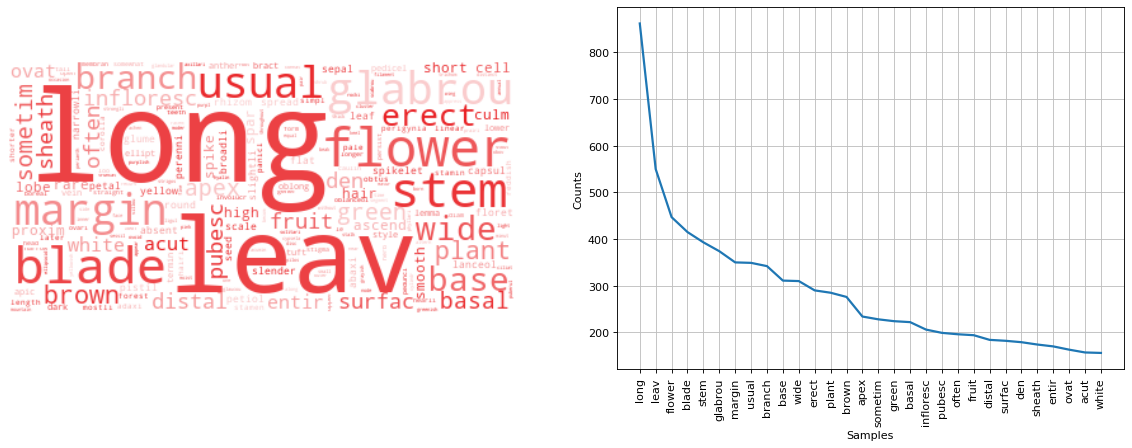

[('long', 862), ('leav', 550), ('flower', 447), ('blade', 415), ('stem', 393), ('glabrou', 374), ('margin', 350), ('usual', 349), ('branch', 342), ('base', 311), ('wide', 310), ('erect', 290), ('plant', 285), ('brown', 276), ('apex', 234), ('sometim', 228), ('green', 224), ('basal', 222), ('infloresc', 206), ('pubesc', 199), ('often', 196), ('fruit', 194), ('distal', 184), ('surfac', 182), ('den', 179), ('sheath', 174), ('entir', 170), ('ovat', 163), ('acut', 157), ('white', 156)]


In [7]:
visualize_words(morphology, tokenized_stop_words, color="red")
visualize_words(morphology, tokenized_stop_words_clean, cleanup=True, color="red")

Keys

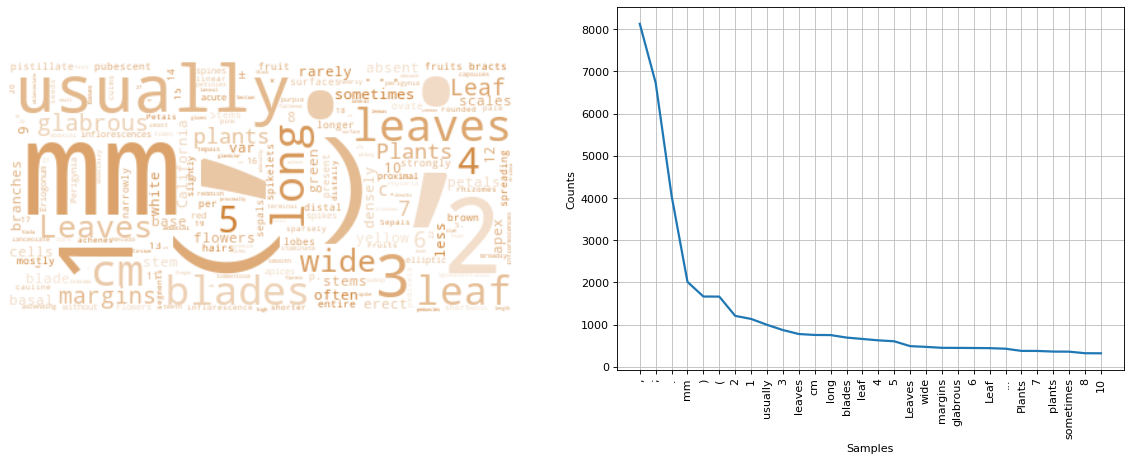

[(',', 8127), (';', 6728), ('.', 4054), ('mm', 2011), (')', 1664), ('(', 1662), ('2', 1205), ('1', 1133), ('usually', 994), ('3', 869), ('leaves', 775), ('cm', 753), ('long', 750), ('blades', 691), ('leaf', 658), ('4', 625), ('5', 603), ('Leaves', 488), ('wide', 470), ('margins', 448), ('glabrous', 446), ('6', 444), ('Leaf', 440), ('...', 427), ('Plants', 375), ('7', 374), ('plants', 359), ('sometimes', 357), ('8', 320), ('10', 318)]


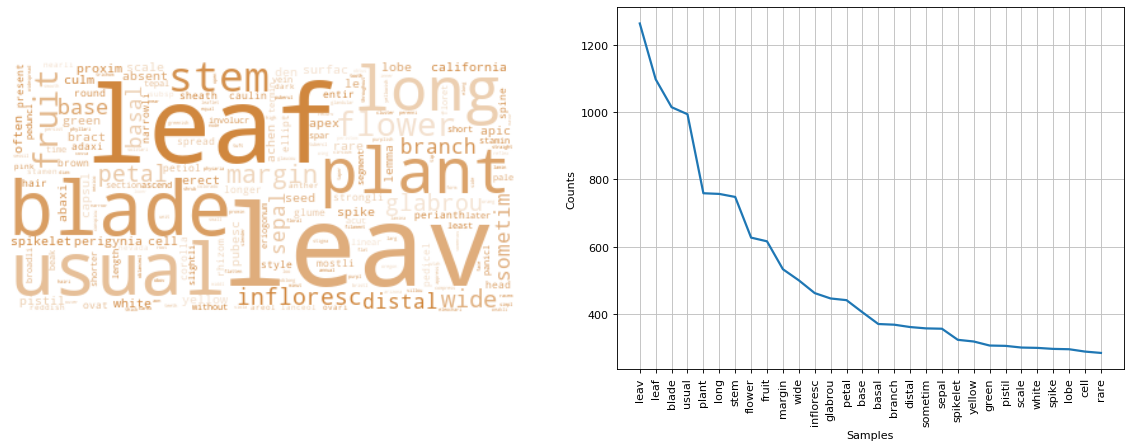

[('leav', 1264), ('leaf', 1098), ('blade', 1015), ('usual', 994), ('plant', 759), ('long', 757), ('stem', 748), ('flower', 627), ('fruit', 616), ('margin', 533), ('wide', 500), ('infloresc', 462), ('glabrou', 446), ('petal', 441), ('base', 405), ('basal', 370), ('branch', 368), ('distal', 361), ('sometim', 357), ('sepal', 356), ('spikelet', 323), ('yellow', 318), ('green', 306), ('pistil', 305), ('scale', 300), ('white', 299), ('spike', 296), ('lobe', 295), ('cell', 288), ('rare', 284)]


In [8]:
visualize_words(key, tokenized_stop_words, color="yellow")
visualize_words(key, tokenized_stop_words_clean, cleanup=True, color="yellow")

Habitat

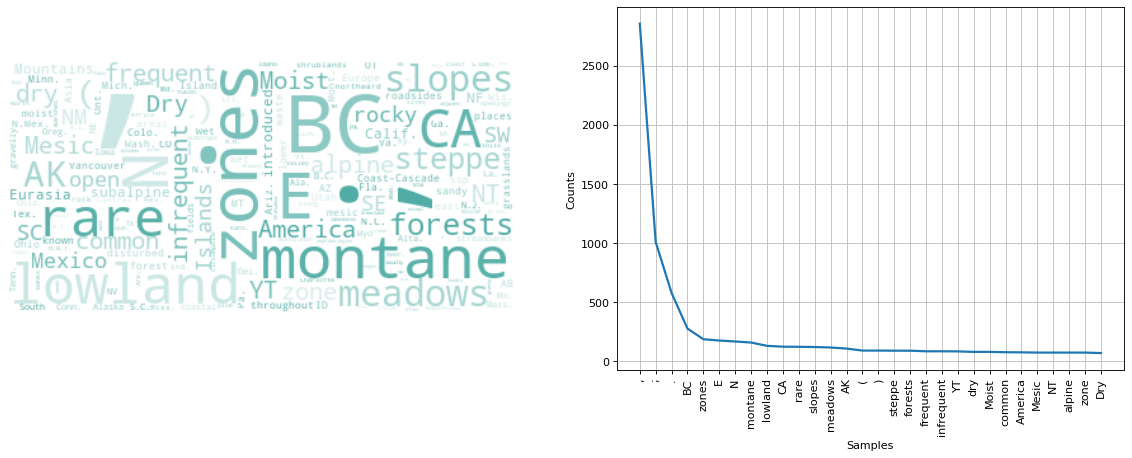

[(',', 2855), (';', 1006), ('.', 575), ('BC', 273), ('zones', 183), ('E', 172), ('N', 164), ('montane', 155), ('lowland', 127), ('CA', 120), ('rare', 119), ('slopes', 117), ('meadows', 113), ('AK', 104), ('(', 87), (')', 87), ('steppe', 86), ('forests', 86), ('frequent', 81), ('infrequent', 81), ('YT', 80), ('dry', 76), ('Moist', 76), ('common', 73), ('America', 72), ('Mesic', 70), ('NT', 70), ('alpine', 70), ('zone', 70), ('Dry', 66)]


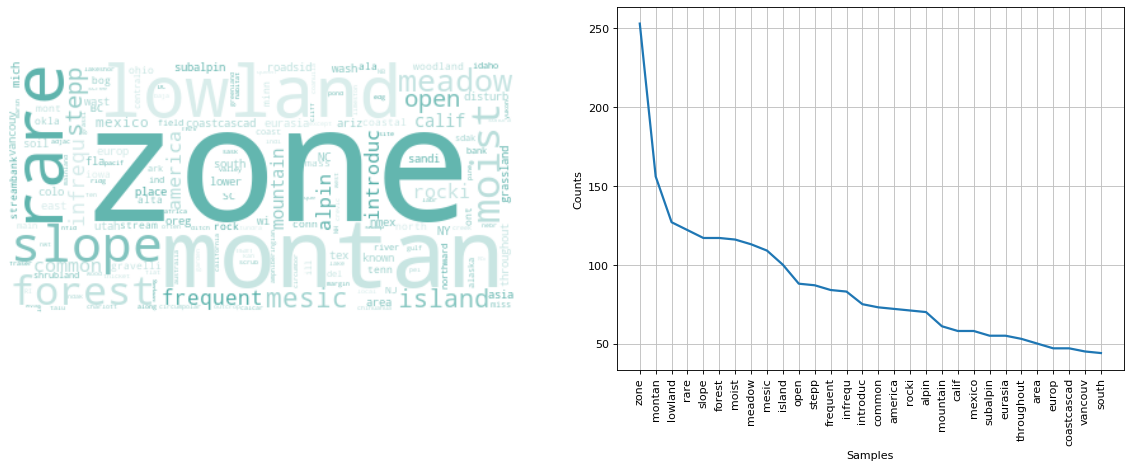

[('zone', 253), ('montan', 156), ('lowland', 127), ('rare', 122), ('slope', 117), ('forest', 117), ('moist', 116), ('meadow', 113), ('mesic', 109), ('island', 100), ('open', 88), ('stepp', 87), ('frequent', 84), ('infrequ', 83), ('introduc', 75), ('common', 73), ('america', 72), ('rocki', 71), ('alpin', 70), ('mountain', 61), ('calif', 58), ('mexico', 58), ('subalpin', 55), ('eurasia', 55), ('throughout', 53), ('area', 50), ('europ', 47), ('coastcascad', 47), ('vancouv', 45), ('south', 44)]


In [9]:
visualize_words(habitat, tokenized_stop_words, color="purple")
visualize_words(habitat, tokenized_stop_words_clean, cleanup=True, color="purple")

### Word clouds by flora source
Are there differences between training sets in the most commonly used words?

In [10]:
bc_text = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.dataset_name == 'bc'].text if text_string not in tokenized_stop_words)
budds_text = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.dataset_name == 'budds'].text if text_string not in tokenized_stop_words)
fna_text = " ".join(text_string for text_string in flora_data_frame[flora_data_frame.dataset_name == 'fna'].text if text_string not in tokenized_stop_words)


BC

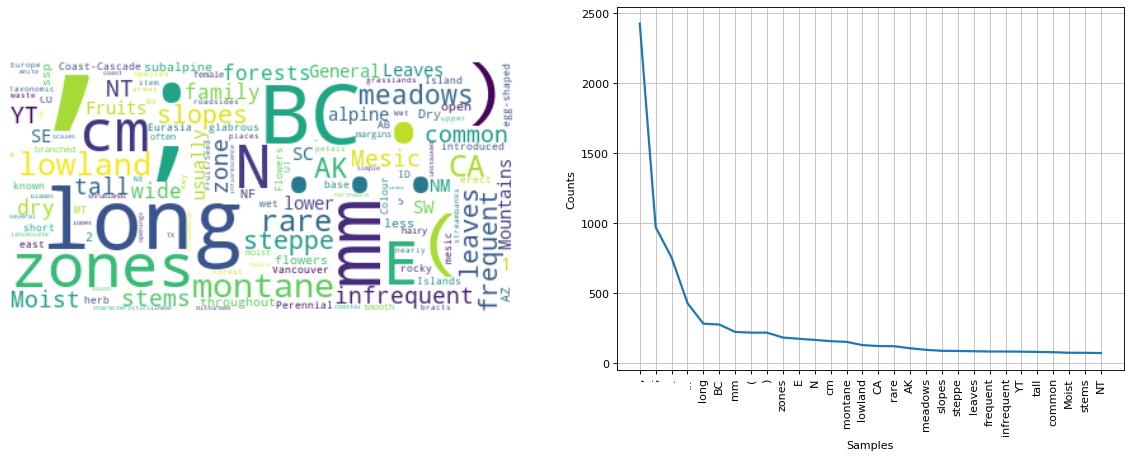

[(',', 2426), (';', 970), ('.', 753), ('...', 427), ('long', 280), ('BC', 274), ('mm', 221), ('(', 216), (')', 216), ('zones', 181), ('E', 172), ('N', 164), ('cm', 155), ('montane', 150), ('lowland', 127), ('CA', 120), ('rare', 119), ('AK', 104), ('meadows', 93), ('slopes', 86), ('steppe', 85), ('leaves', 83), ('frequent', 81), ('infrequent', 81), ('YT', 80), ('tall', 78), ('common', 76), ('Moist', 72), ('stems', 72), ('NT', 70)]


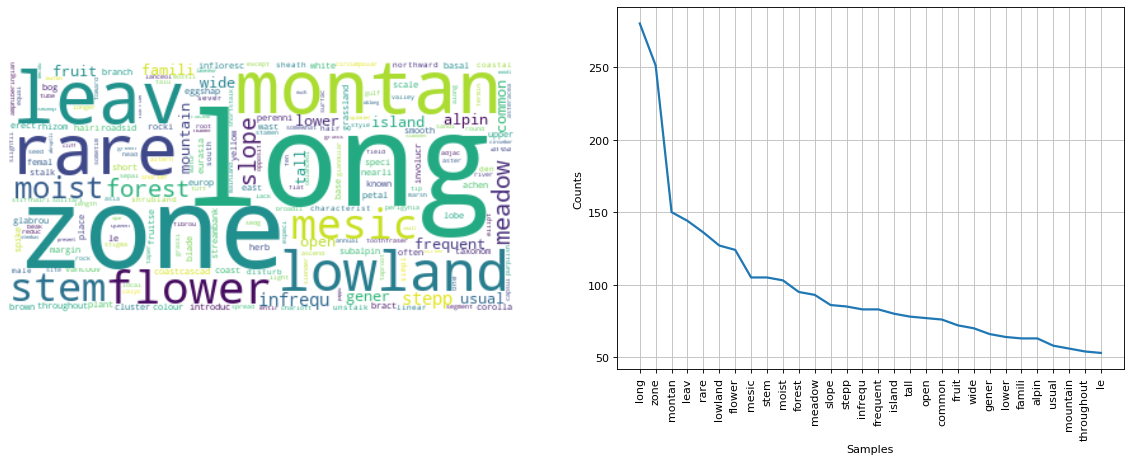

[('long', 280), ('zone', 251), ('montan', 150), ('leav', 144), ('rare', 136), ('lowland', 127), ('flower', 124), ('mesic', 105), ('stem', 105), ('moist', 103), ('forest', 95), ('meadow', 93), ('slope', 86), ('stepp', 85), ('infrequ', 83), ('frequent', 83), ('island', 80), ('tall', 78), ('open', 77), ('common', 76), ('fruit', 72), ('wide', 70), ('gener', 66), ('lower', 64), ('famili', 63), ('alpin', 63), ('usual', 58), ('mountain', 56), ('throughout', 54), ('le', 53)]


In [11]:
visualize_words(bc_text, tokenized_stop_words)
visualize_words(bc_text, tokenized_stop_words_clean, cleanup=True)

FNA

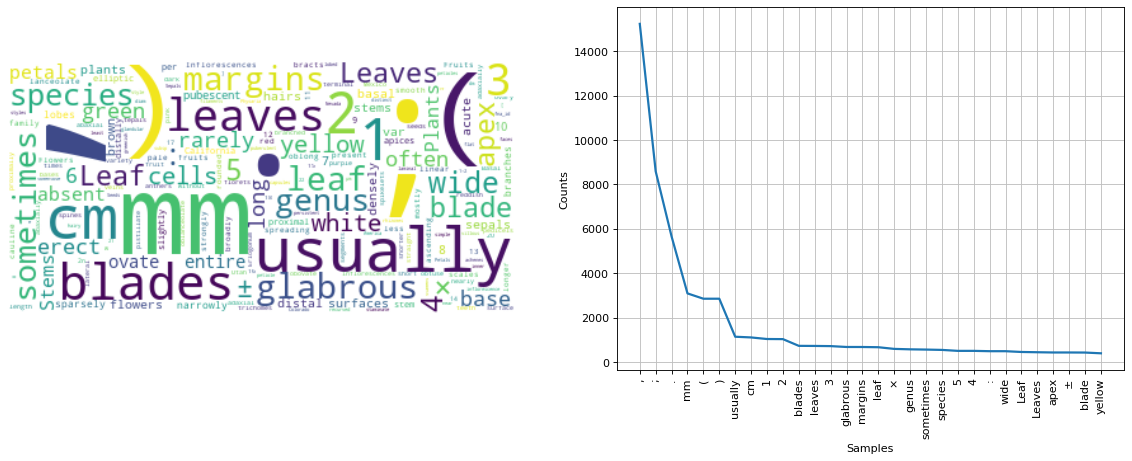

[(',', 15237), (';', 8591), ('.', 5655), ('mm', 3090), ('(', 2851), (')', 2851), ('usually', 1138), ('cm', 1106), ('1', 1035), ('2', 1030), ('blades', 727), ('leaves', 723), ('3', 715), ('glabrous', 676), ('margins', 675), ('leaf', 665), ('×', 590), ('genus', 570), ('sometimes', 559), ('species', 544), ('5', 501), ('4', 501), (':', 486), ('wide', 486), ('Leaf', 451), ('Leaves', 439), ('apex', 428), ('±', 428), ('blade', 425), ('yellow', 391)]


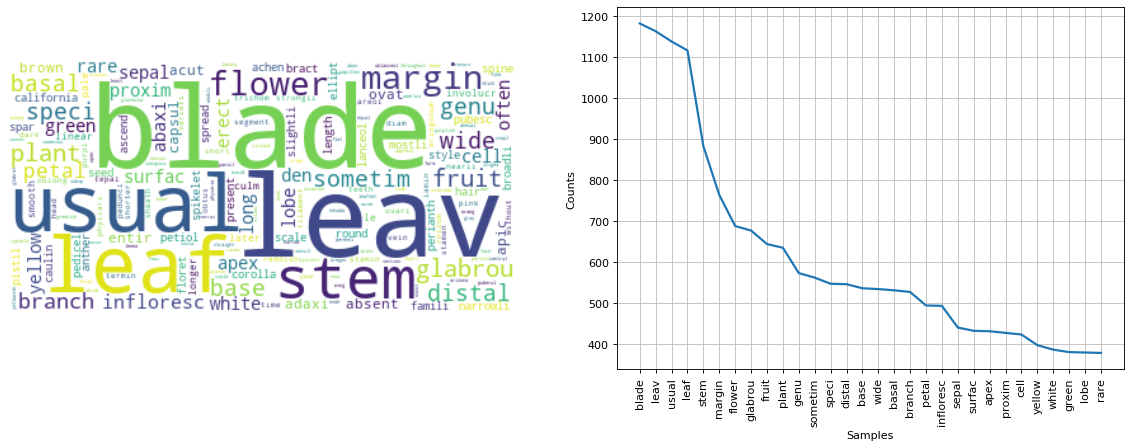

[('blade', 1182), ('leav', 1163), ('usual', 1138), ('leaf', 1116), ('stem', 882), ('margin', 763), ('flower', 687), ('glabrou', 676), ('fruit', 643), ('plant', 634), ('genu', 572), ('sometim', 561), ('speci', 546), ('distal', 545), ('base', 535), ('wide', 533), ('basal', 530), ('branch', 526), ('petal', 493), ('infloresc', 492), ('sepal', 439), ('surfac', 431), ('apex', 430), ('proxim', 426), ('cell', 422), ('yellow', 396), ('white', 385), ('green', 379), ('lobe', 378), ('rare', 377)]


In [12]:
visualize_words(fna_text, tokenized_stop_words)
visualize_words(fna_text, tokenized_stop_words_clean, cleanup=True)

Budds

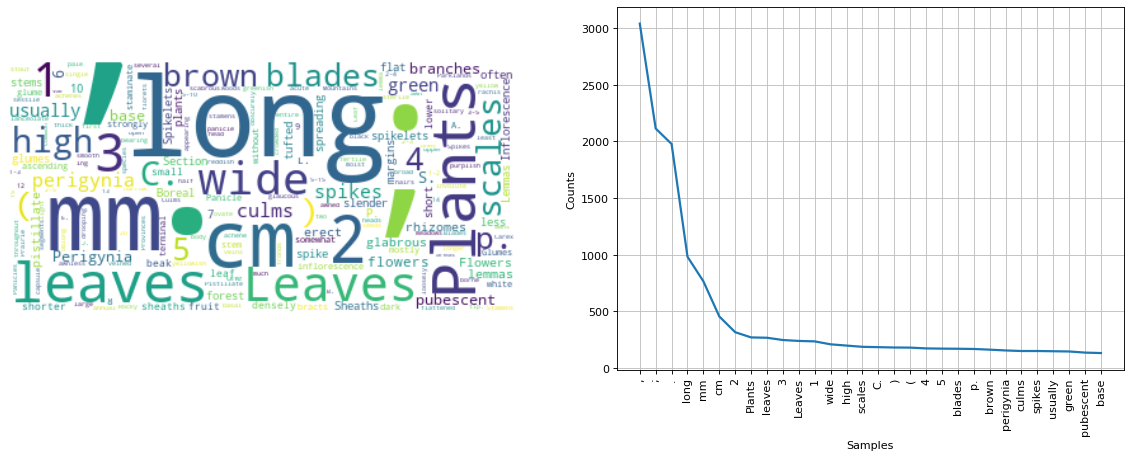

[(',', 3039), (';', 2113), ('.', 1977), ('long', 982), ('mm', 765), ('cm', 455), ('2', 316), ('Plants', 270), ('leaves', 267), ('3', 247), ('Leaves', 239), ('1', 235), ('wide', 209), ('high', 198), ('scales', 187), ('C.', 184), (')', 181), ('(', 180), ('4', 173), ('5', 171), ('blades', 170), ('p.', 168), ('brown', 162), ('perigynia', 155), ('culms', 150), ('spikes', 150), ('usually', 148), ('green', 146), ('pubescent', 136), ('base', 132)]


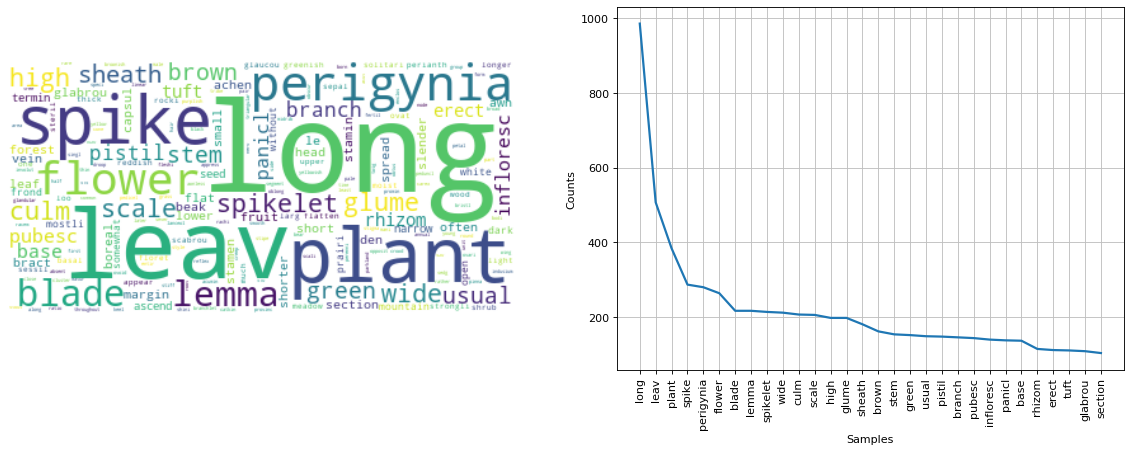

[('long', 985), ('leav', 507), ('plant', 384), ('spike', 287), ('perigynia', 280), ('flower', 264), ('blade', 217), ('lemma', 217), ('spikelet', 214), ('wide', 212), ('culm', 207), ('scale', 206), ('high', 198), ('glume', 198), ('sheath', 181), ('brown', 162), ('stem', 154), ('green', 152), ('usual', 149), ('pistil', 148), ('branch', 146), ('pubesc', 144), ('infloresc', 140), ('panicl', 138), ('base', 137), ('rhizom', 115), ('erect', 112), ('tuft', 111), ('glabrou', 109), ('section', 104)]


In [13]:
visualize_words(budds_text, tokenized_stop_words)
visualize_words(budds_text, tokenized_stop_words_clean, cleanup=True)

### Visualize distinctive words using tf-idf


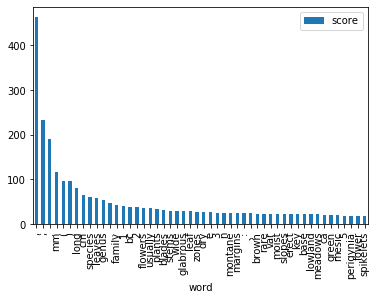

In [14]:
custom_vec = TfidfVectorizer(lowercase=True, tokenizer=features.flora_tokenizer, stop_words=tokenized_stop_words, ngram_range=(1, 1))
text_counts = custom_vec.fit_transform(flora_data_frame['text'])  # Build TF-IDF Matrix

scores = zip(custom_vec.get_feature_names(), np.asarray(text_counts.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
#for item in sorted_scores:
 #   print("{0:10} Score: {1}".format(item[0], item[1]))
    
sorted_scores_df = pd.DataFrame(sorted_scores, columns=['word', 'score']).iloc[:50]
sorted_scores_df.plot.bar(x='word', y='score')
plt.show()

Distinctive words with new cleaning regime

/Users/jocelynpender/miniconda3/envs/flora-prepper/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


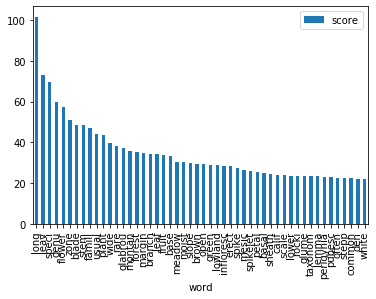

In [15]:
custom_vec = TfidfVectorizer(lowercase=True, tokenizer=features.flora_tokenizer_clean, stop_words=tokenized_stop_words_clean, ngram_range=(1, 1))
text_counts = custom_vec.fit_transform(flora_data_frame['text'])  # Build TF-IDF Matrix

scores = zip(custom_vec.get_feature_names(), np.asarray(text_counts.sum(axis=0)).ravel())
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
#for item in sorted_scores:
 #   print("{0:10} Score: {1}".format(item[0], item[1]))
    
sorted_scores_df = pd.DataFrame(sorted_scores, columns=['word', 'score']).iloc[:50]
sorted_scores_df.plot.bar(x='word', y='score')
plt.show()

## Run a DTM based model and a TFIDF based model and review accuracy

In [16]:
# ==== DTM =====
dtm_text_counts = build_dtm_text_counts(features.flora_tokenizer, tokenized_stop_words, flora_data_frame)
dtm_X_test, dtm_predictions = run_model(dtm_text_counts, flora_data_frame)

# ==== TFIDF =====
tfidf_text_counts = build_tfidf_text_counts(features.flora_tokenizer, tokenized_stop_words, flora_data_frame)
tfidf_X_test, tfidf_predictions = run_model(tfidf_text_counts, flora_data_frame)


MultinomialNB Accuracy: 0.9034981905910736
MultinomialNB Accuracy: 0.8866103739445115


#### View classified statements

In [17]:
results = zip(dtm_X_test, dtm_predictions)
print(tuple(results)[:10])

((<1x13617 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>, 'key'), (<1x13617 sparse matrix of type '<class 'numpy.int64'>'
	with 183 stored elements in Compressed Sparse Row format>, 'key'), (<1x13617 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>, 'taxon_identification'), (<1x13617 sparse matrix of type '<class 'numpy.int64'>'
	with 60 stored elements in Compressed Sparse Row format>, 'morphology'), (<1x13617 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>, 'taxon_identification'), (<1x13617 sparse matrix of type '<class 'numpy.int64'>'
	with 49 stored elements in Compressed Sparse Row format>, 'key'), (<1x13617 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>, 'taxon_identification'), (<1x13617 sparse matrix of type '<class 'numpy.int64'>'
	with 46 stored elements i

### Run with strict cleaning regime

In [16]:
# ==== DTM =====
dtm_text_counts = build_dtm_text_counts(features.flora_tokenizer_clean, tokenized_stop_words_clean, flora_data_frame)
dtm_X_test, dtm_predictions = run_model(dtm_text_counts, flora_data_frame)

# ==== TFIDF =====
tfidf_text_counts = build_tfidf_text_counts(features.flora_tokenizer_clean, tokenized_stop_words_clean, flora_data_frame)
tfidf_X_test, tfidf_predictions = run_model(tfidf_text_counts, flora_data_frame)


/Users/jocelynpender/miniconda3/envs/flora-prepper/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


MultinomialNB Accuracy: 0.7949336550060314


/Users/jocelynpender/miniconda3/envs/flora-prepper/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


MultinomialNB Accuracy: 0.7478890229191797


In [18]:
# TODO: View incorrectly classified statements

# Currently not working

#for item, labels in zip(X_test, predictions):
 #   print('%s => %s' % (item, ', '.join(flora_data_frame.classification[x] for x in labels)))

## Run a model based on text length

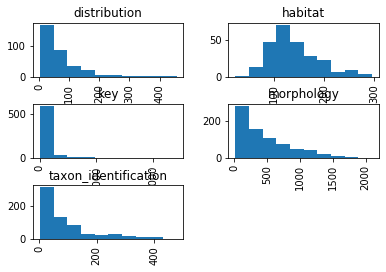

In [19]:
# Process text, remove stopwords. Remove empty cells.
length_processed_flora_data_frame = features.process_length_in_place(flora_data_frame, tokenized_stop_words)

plot = length_processed_flora_data_frame['length'].hist(by=length_processed_flora_data_frame['classification'])
plt.show()

It looks like discussion should be removed from the dataset. It is curiously short in length. This may be an artifact from the bc dataset.

In [20]:
length_custom_vec = CountVectorizer(lowercase=True, tokenizer=features.flora_tokenizer, stop_words=tokenized_stop_words,
                                 ngram_range=(1, 1))
length_text_counts = length_custom_vec.fit_transform(length_processed_flora_data_frame['text'])

length_model_sparse = features.prepare_length_features(length_text_counts, length_custom_vec, length_processed_flora_data_frame)

X_test, predicted = run_model(length_model_sparse, length_processed_flora_data_frame)

MultinomialNB Accuracy: 0.8815286624203822


In [21]:
#fig,ax = plt.subplots(figsize=(5,5))
#plt.boxplot(df_train_1.phrase_len)
#plt.show()


To do plots:
classification coloured by source

## Run a model with only the most frequently occurring words

In [22]:
all_text = " ".join(text_string for text_string in flora_data_frame.text)
all_text = features.flora_tokenizer(all_text)
top_words_text = features.find_most_frequent_words(all_text, threshold=2000)
top_words_flora_data_frame = features.filter_data_frame_top_words(flora_data_frame, top_words_text, tokenized_stop_words)
top_words_flora_data_frame

,Unnamed: 0,dataset_name,row_id,classification,length,row,species,text
0,0,budds,265,morphology,394,135.0,NaN,"plants densely tufted, erect, cm high . sheath..."
1,1,bc,3027,morphology,506,NaN,Carex macloviana,"fruits perigynia egg-shaped, mm long , 1-1.5 m..."
2,2,bc,2675,morphology,178,NaN,Epilobium angustifolium ssp. angustifolium,general perennial herb widespread root; stems ...
3,3,bc,758,key,40,NaN,Myriophyllum sibiricum,key species taxonomic
4,4,fna,5219,morphology,1090,NaN,NaN,"herbs, erect, matted, × 1–2 dm, tomentose floc..."
...,...,...,...,...,...,...,...,...
2758,2758,fna,9519,distribution,91,NaN,NaN,"mountain slopes, roadsides, fields, , stream b..."
2759,2759,bc,1681,key,224,NaN,Myrica californica,"1 . plants evergreen, monoecious , 2-6 tall; l..."
2760,2760,bc,3696,morphology,135,NaN,Bidens vulgata,"fruits achenes 6-12 mm long, olive brown somew..."
2761,2761,budds,395,taxon_identification,48,148.0,NaN,occidentalis s. . western


In [23]:
all_text_custom_vec = CountVectorizer(lowercase=True, tokenizer=features.flora_tokenizer, stop_words=tokenized_stop_words,
                                 ngram_range=(1, 1))
all_text_counts = all_text_custom_vec.fit_transform(top_words_flora_data_frame['text'])
X_test, predicted = run_model(all_text_counts, top_words_flora_data_frame)

MultinomialNB Accuracy: 0.893848009650181
